<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [4]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.12.0'

In [5]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

This session will run on CPU.


In [6]:
df = pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.shape

(10000, 14)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.isnull().sum().any()

False

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [15]:
df.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [16]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [17]:
df.shape

(10000, 11)

**Exited**

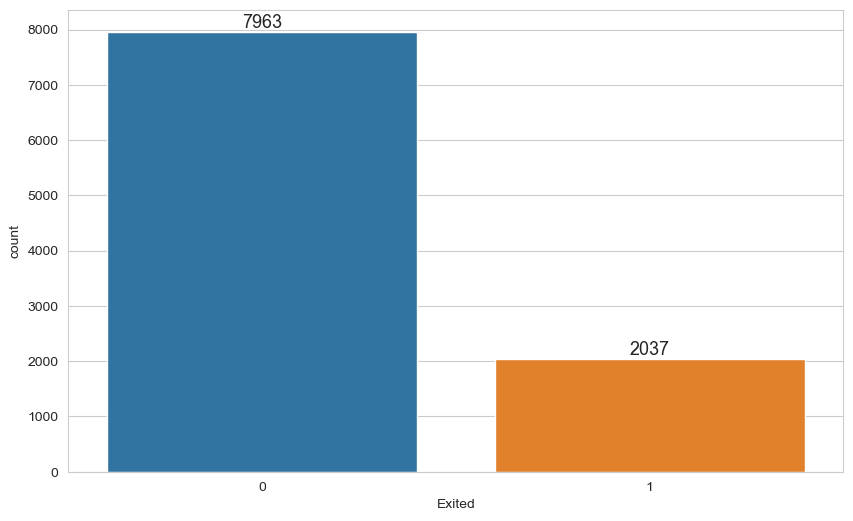

In [18]:
sns.countplot(x = df["Exited"], data = df)
for index,value in enumerate(df["Exited"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

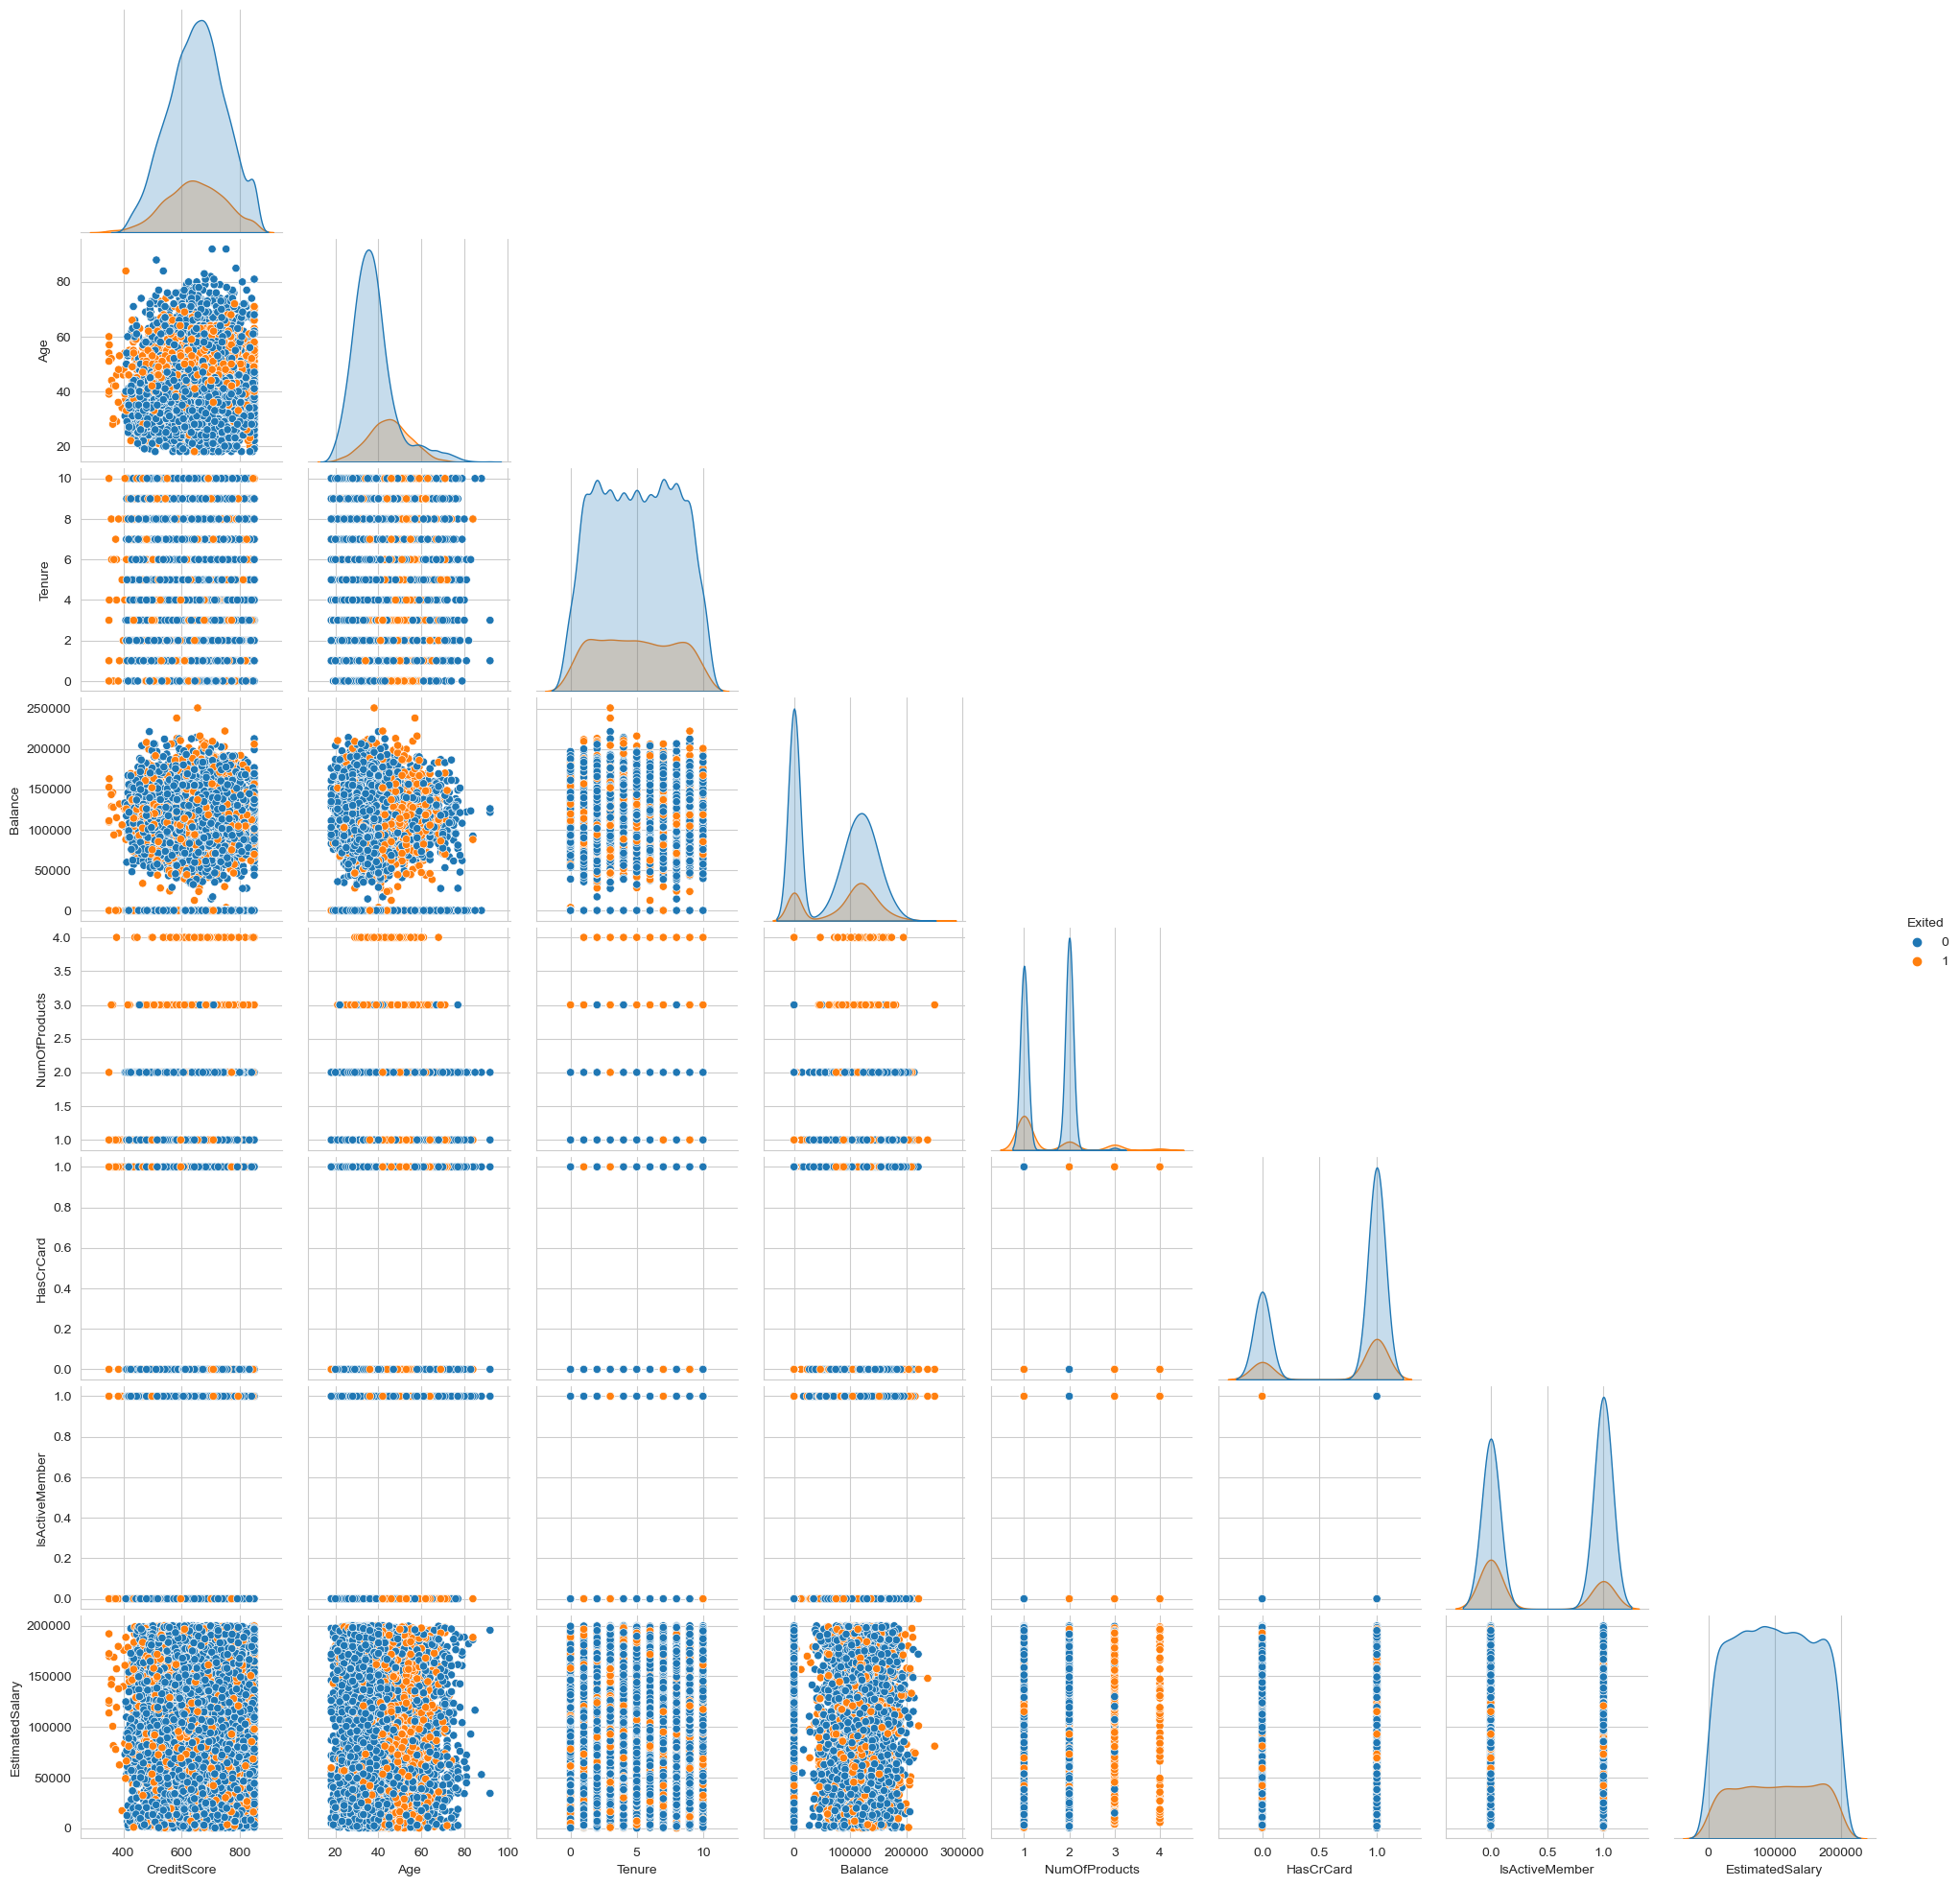

In [19]:
sns.pairplot(df, hue="Exited", corner=True);

<AxesSubplot:>

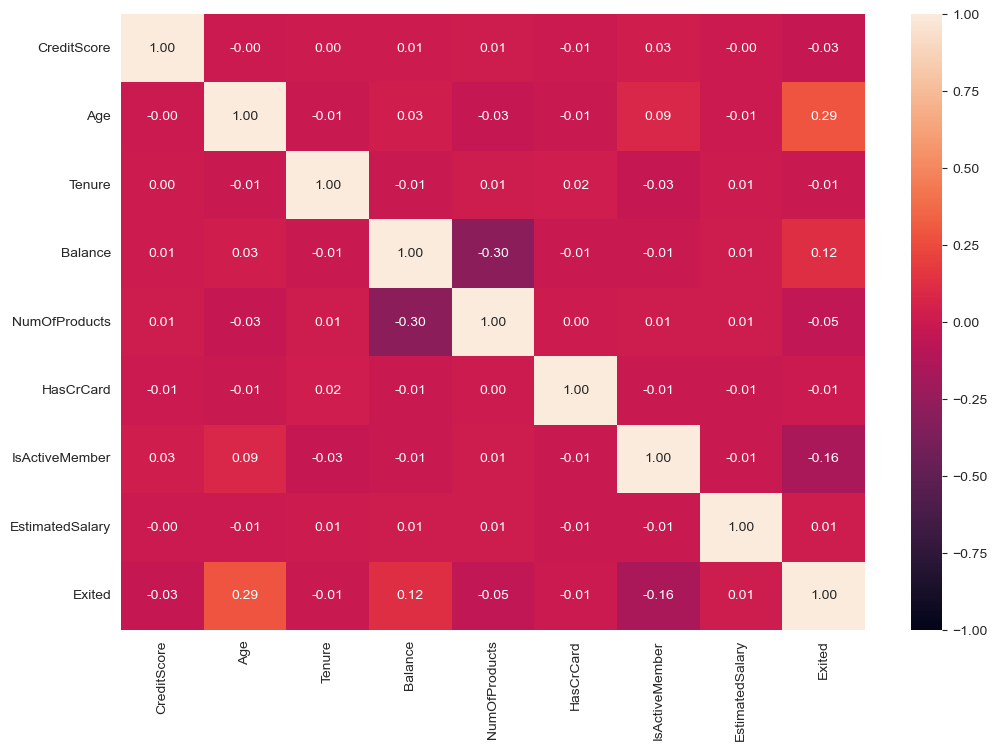

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt= '.2f', vmin=-1, vmax=1)

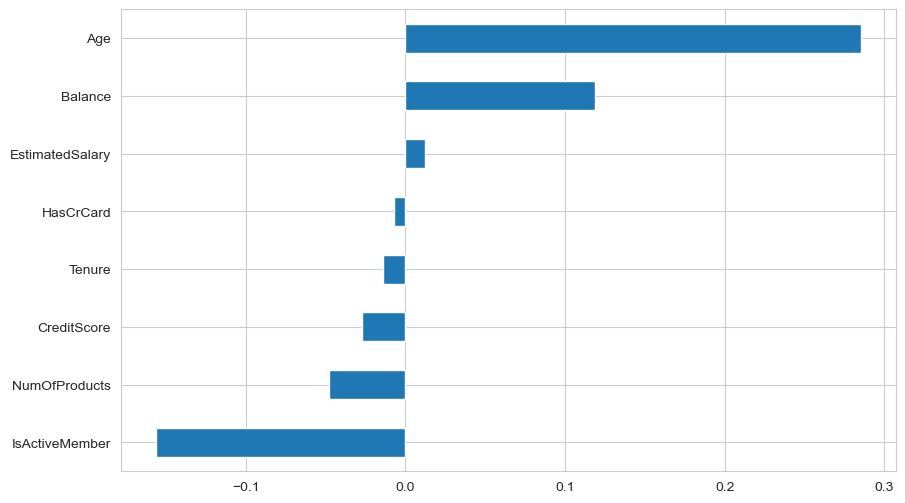

In [21]:
df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind = "barh");

**CreditScore and Exited**

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

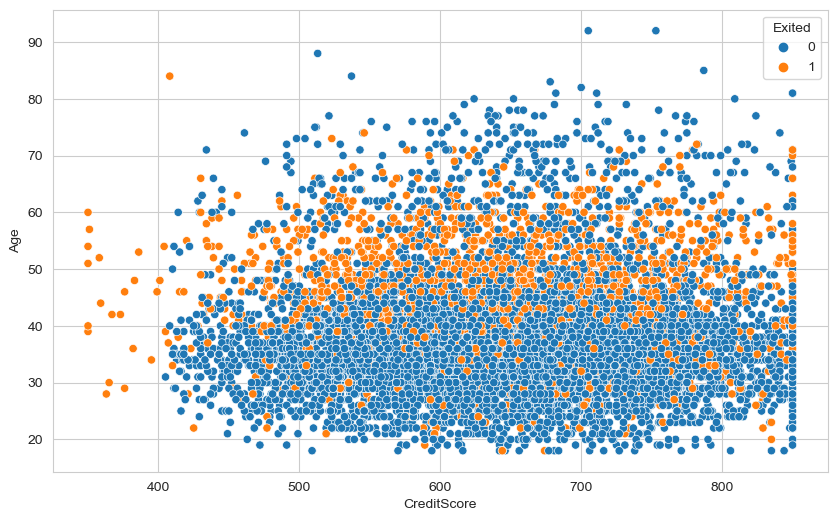

In [22]:
sns.scatterplot(data=df, x = "CreditScore", y = "Age", hue = "Exited")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

**Categorical Columns**

In [23]:
df[['Geography', 'Gender']].head().T

,0,1,2,3,4
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female


In [28]:
df = pd.get_dummies(df,dtype=int)

In [29]:
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [30]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [31]:
seed = 13

In [34]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed
)

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_validate

In [38]:
X_train.shape

(8100, 13)

In [39]:
X_val.shape

(900, 13)

In [40]:
X_test.shape

(1000, 13)

In [41]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5098 - accuracy: 0.7799 - val_loss: 0.4651 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4583 - accuracy: 0.7975 - val_loss: 0.4409 - val_accuracy: 0.8044
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8106 - val_loss: 0.4160 - val_accuracy: 0.8156
Epoch 4/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8172 - val_loss: 0.4016 - val_accuracy: 0.8311
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8326 - val_loss: 0.3771 - val_accuracy: 0.8333
Epoch 6/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3707 - accuracy: 0.8438 - val_loss: 0.3521 - val_accuracy: 0.8444
Epoch 7/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8531 - val_loss: 0.3445 - val_accuracy: 0.8511

Epoch 58/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8680 - val_loss: 0.3195 - val_accuracy: 0.8700
Epoch 59/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8704 - val_loss: 0.3200 - val_accuracy: 0.8789
Epoch 60/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8698 - val_loss: 0.3213 - val_accuracy: 0.8667
Epoch 61/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8696 - val_loss: 0.3194 - val_accuracy: 0.8667
Epoch 62/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.8715 - val_loss: 0.3227 - val_accuracy: 0.8722
Epoch 63/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8716 - val_loss: 0.3338 - val_accuracy: 0.8678
Epoch 64/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.8679 - val_loss: 0.3211 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8740 - val_loss: 0.3204 - val_accuracy: 0.8711
Epoch 116/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3012 - accuracy: 0.8784 - val_loss: 0.3193 - val_accuracy: 0.8789
Epoch 117/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.8759 - val_loss: 0.3243 - val_accuracy: 0.8689
Epoch 118/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8763 - val_loss: 0.3246 - val_accuracy: 0.8744
Epoch 119/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.8753 - val_loss: 0.3257 - val_accuracy: 0.8700
Epoch 120/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3004 - accuracy: 0.8775 - val_loss: 0.3225 - val_accuracy: 0.8700
Epoch 121/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8765 - val_loss: 0.3208 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8804 - val_loss: 0.3275 - val_accuracy: 0.8756
Epoch 172/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8816 - val_loss: 0.3358 - val_accuracy: 0.8633
Epoch 173/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2902 - accuracy: 0.8816 - val_loss: 0.3341 - val_accuracy: 0.8722
Epoch 174/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2895 - accuracy: 0.8836 - val_loss: 0.3223 - val_accuracy: 0.8733
Epoch 175/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8810 - val_loss: 0.3282 - val_accuracy: 0.8678
Epoch 176/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2891 - accuracy: 0.8822 - val_loss: 0.3278 - val_accuracy: 0.8711
Epoch 177/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8831 - val_loss: 0.3263 - val_accuracy: 0.8733

254/254 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.8869 - val_loss: 0.3411 - val_accuracy: 0.8756
Epoch 228/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2821 - accuracy: 0.8828 - val_loss: 0.3327 - val_accuracy: 0.8700
Epoch 229/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8844 - val_loss: 0.3404 - val_accuracy: 0.8700
Epoch 230/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8841 - val_loss: 0.3334 - val_accuracy: 0.8778
Epoch 231/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.8867 - val_loss: 0.3384 - val_accuracy: 0.8678
Epoch 232/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.8863 - val_loss: 0.3340 - val_accuracy: 0.8733
Epoch 233/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.8858 - val_loss: 0.3366 - val_accuracy: 0.8678

254/254 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8878 - val_loss: 0.3482 - val_accuracy: 0.8633
Epoch 284/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.8885 - val_loss: 0.3473 - val_accuracy: 0.8733
Epoch 285/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.8890 - val_loss: 0.3528 - val_accuracy: 0.8622
Epoch 286/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.8883 - val_loss: 0.3376 - val_accuracy: 0.8733
Epoch 287/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.8894 - val_loss: 0.3444 - val_accuracy: 0.8667
Epoch 288/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.8865 - val_loss: 0.3486 - val_accuracy: 0.8633
Epoch 289/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.8906 - val_loss: 0.3396 - val_accuracy: 0.8722

254/254 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.8891 - val_loss: 0.3570 - val_accuracy: 0.8622
Epoch 340/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2655 - accuracy: 0.8920 - val_loss: 0.3627 - val_accuracy: 0.8700
Epoch 341/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8912 - val_loss: 0.3683 - val_accuracy: 0.8656
Epoch 342/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8902 - val_loss: 0.3658 - val_accuracy: 0.8656
Epoch 343/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8901 - val_loss: 0.3617 - val_accuracy: 0.8622
Epoch 344/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8907 - val_loss: 0.3571 - val_accuracy: 0.8678
Epoch 345/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8910 - val_loss: 0.3587 - val_accuracy: 0.8689

254/254 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8928 - val_loss: 0.3766 - val_accuracy: 0.8589
Epoch 396/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2573 - accuracy: 0.8949 - val_loss: 0.3775 - val_accuracy: 0.8600
Epoch 397/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8948 - val_loss: 0.3799 - val_accuracy: 0.8656
Epoch 398/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8935 - val_loss: 0.3812 - val_accuracy: 0.8656
Epoch 399/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.8959 - val_loss: 0.3763 - val_accuracy: 0.8567
Epoch 400/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2578 - accuracy: 0.8953 - val_loss: 0.3764 - val_accuracy: 0.8633
Epoch 401/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8935 - val_loss: 0.3831 - val_accuracy: 0.8611

254/254 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8943 - val_loss: 0.3824 - val_accuracy: 0.8644
Epoch 452/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.8978 - val_loss: 0.3794 - val_accuracy: 0.8689
Epoch 453/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8943 - val_loss: 0.3852 - val_accuracy: 0.8622
Epoch 454/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.8960 - val_loss: 0.3940 - val_accuracy: 0.8589
Epoch 455/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2530 - accuracy: 0.8977 - val_loss: 0.3796 - val_accuracy: 0.8611
Epoch 456/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2509 - accuracy: 0.8984 - val_loss: 0.3850 - val_accuracy: 0.8600
Epoch 457/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2513 - accuracy: 0.8986 - val_loss: 0.3843 - val_accuracy: 0.8544

254/254 [==============================] - 1s 2ms/step - loss: 0.2474 - accuracy: 0.8975 - val_loss: 0.3962 - val_accuracy: 0.8678
Epoch 508/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2499 - accuracy: 0.8962 - val_loss: 0.4015 - val_accuracy: 0.8556
Epoch 509/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.8988 - val_loss: 0.3920 - val_accuracy: 0.8633
Epoch 510/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2467 - accuracy: 0.8990 - val_loss: 0.4015 - val_accuracy: 0.8589
Epoch 511/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8989 - val_loss: 0.3976 - val_accuracy: 0.8644
Epoch 512/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.8965 - val_loss: 0.3950 - val_accuracy: 0.8689
Epoch 513/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2487 - accuracy: 0.8977 - val_loss: 0.3996 - val_accuracy: 0.8644

254/254 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.8998 - val_loss: 0.4144 - val_accuracy: 0.8544
Epoch 564/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8993 - val_loss: 0.4274 - val_accuracy: 0.8589
Epoch 565/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9002 - val_loss: 0.4197 - val_accuracy: 0.8633
Epoch 566/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8985 - val_loss: 0.4074 - val_accuracy: 0.8678
Epoch 567/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.8996 - val_loss: 0.4114 - val_accuracy: 0.8600
Epoch 568/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.8999 - val_loss: 0.4207 - val_accuracy: 0.8556
Epoch 569/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.8996 - val_loss: 0.4082 - val_accuracy: 0.8600

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.510,0.780,0.465,0.797
1,0.458,0.798,0.441,0.804
2,0.432,0.811,0.416,0.816
3,0.413,0.817,0.402,0.831
4,0.392,0.833,0.377,0.833


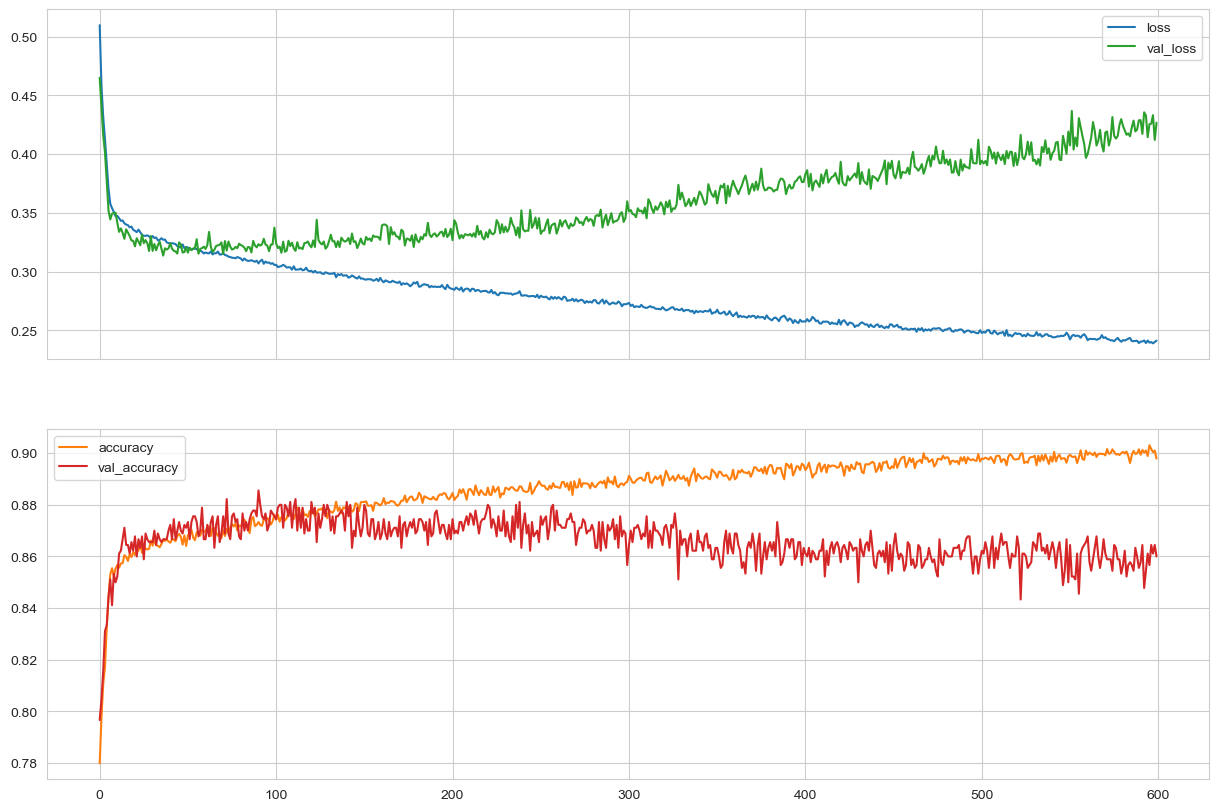

In [45]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [46]:
model.evaluate(X_test, y_test, verbose=0)

[0.5581699013710022, 0.8209999799728394]

In [47]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5581699013710022
accuracy:  0.8209999799728394


In [48]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[725  71]
 [108  96]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       796
           1       0.57      0.47      0.52       204

    accuracy                           0.82      1000
   macro avg       0.72      0.69      0.70      1000
weighted avg       0.81      0.82      0.81      1000



### Add Early Stop

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [51]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [52]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4895 - accuracy: 0.7904 - val_loss: 0.4555 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4474 - accuracy: 0.8053 - val_loss: 0.4265 - val_accuracy: 0.8167
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8151 - val_loss: 0.4116 - val_accuracy: 0.8222
Epoch 4/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.8220 - val_loss: 0.3961 - val_accuracy: 0.8278
Epoch 5/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8325 - val_loss: 0.3755 - val_accuracy: 0.8278
Epoch 6/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8399 - val_loss: 0.3565 - val_accuracy: 0.8456
Epoch 7/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8494 - val_loss: 0.3517 - val_accuracy: 0.8467

Epoch 58/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3169 - accuracy: 0.8696 - val_loss: 0.3218 - val_accuracy: 0.8756
Epoch 59/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3156 - accuracy: 0.8709 - val_loss: 0.3206 - val_accuracy: 0.8767
Epoch 60/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8722 - val_loss: 0.3311 - val_accuracy: 0.8711
Epoch 61/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.8714 - val_loss: 0.3214 - val_accuracy: 0.8700
Epoch 62/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3153 - accuracy: 0.8694 - val_loss: 0.3267 - val_accuracy: 0.8744
Epoch 63/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8714 - val_loss: 0.3383 - val_accuracy: 0.8600
Epoch 63: early stopping


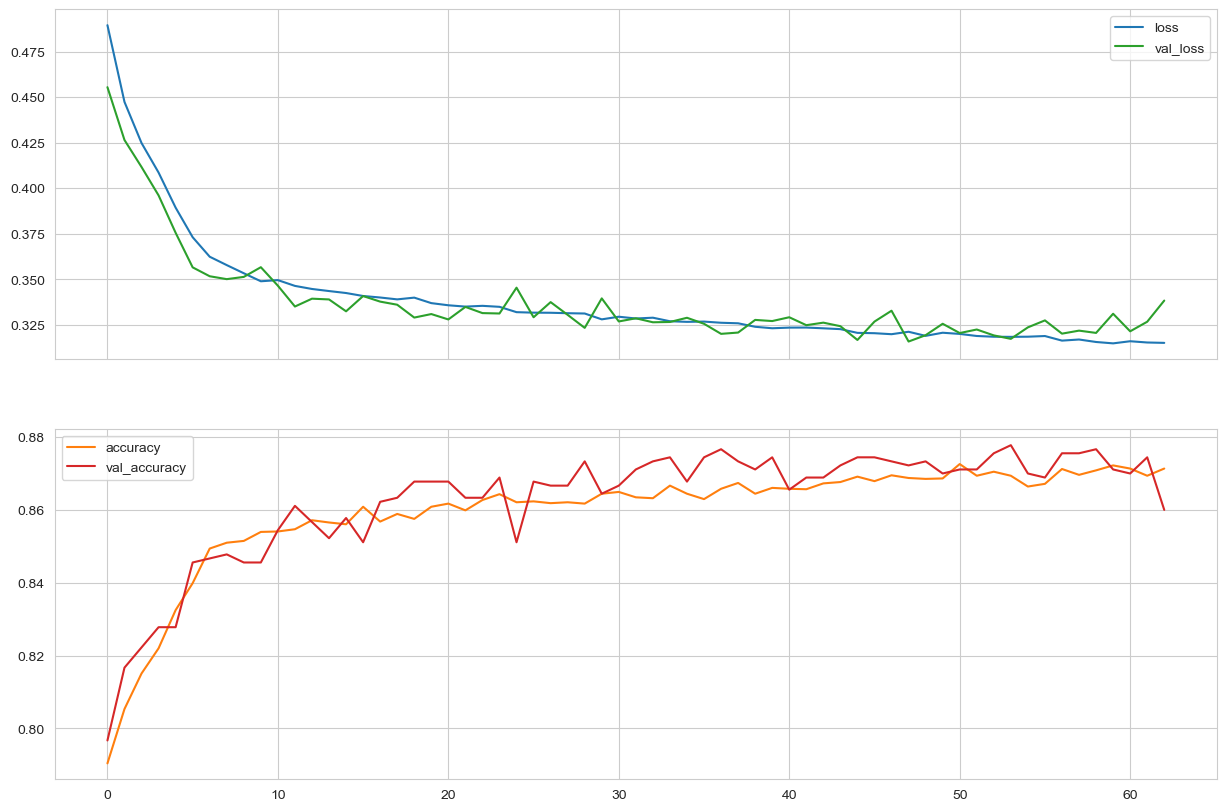

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [54]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3659111261367798
accuracy:  0.8519999980926514


In [55]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[756  40]
 [108  96]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.47      0.56       204

    accuracy                           0.85      1000
   macro avg       0.79      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### learning_rate

In [56]:
from tensorflow.keras.optimizers import Adam

In [57]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [58]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [59]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.7944 - val_loss: 0.4287 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.8140 - val_loss: 0.3912 - val_accuracy: 0.8289
Epoch 3/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8400 - val_loss: 0.3825 - val_accuracy: 0.8422
Epoch 4/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3653 - accuracy: 0.8481 - val_loss: 0.3394 - val_accuracy: 0.8589
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8514 - val_loss: 0.3453 - val_accuracy: 0.8567
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8560 - val_loss: 0.3356 - val_accuracy: 0.8600
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8570 - val_loss: 0.3385 - val_accuracy: 0.8633

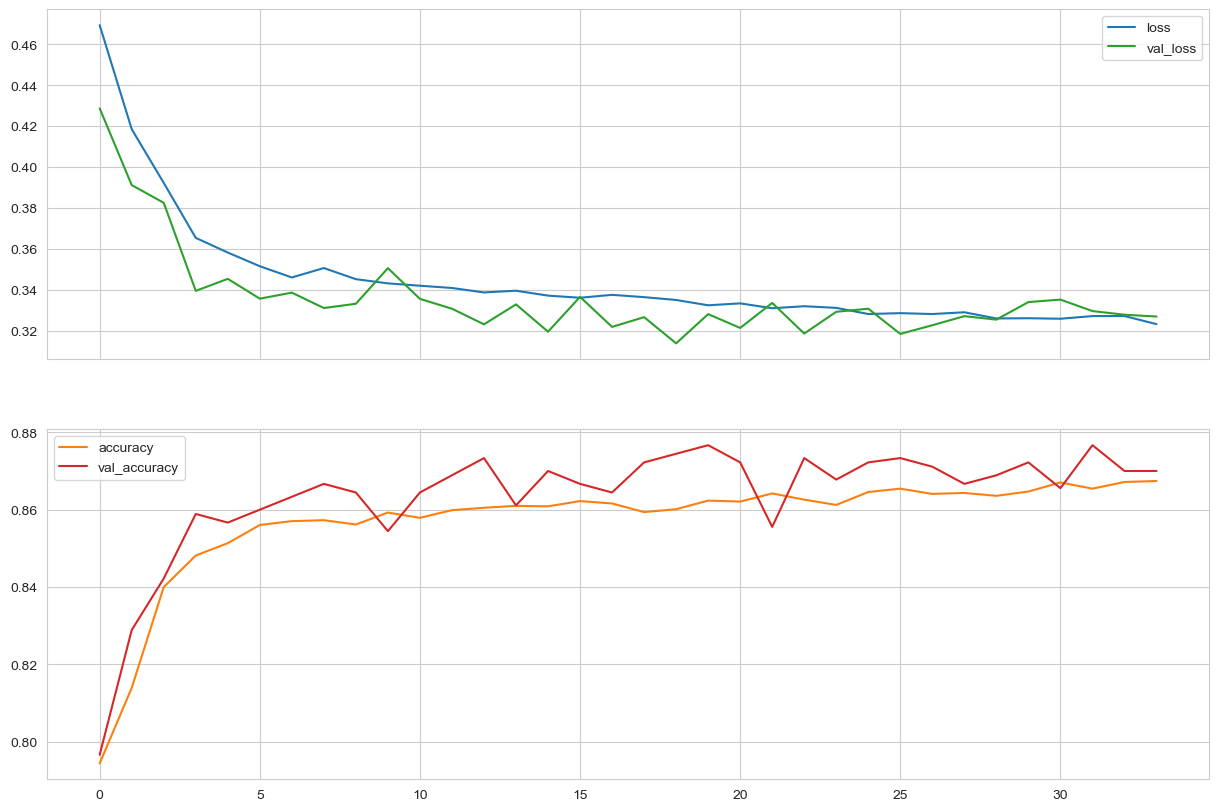

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3611944019794464
accuracy:  0.8550000190734863


In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[775  21]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.79      0.39      0.52       204

    accuracy                           0.85      1000
   macro avg       0.83      0.68      0.72      1000
weighted avg       0.85      0.85      0.83      1000



### Dropout

In [63]:
from tensorflow.keras.layers import Dropout

In [69]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [70]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5378 - accuracy: 0.7901 - val_loss: 0.4760 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.7968 - val_loss: 0.4563 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4837 - accuracy: 0.7959 - val_loss: 0.4502 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4734 - accuracy: 0.7965 - val_loss: 0.4392 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7967 - val_loss: 0.4368 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4553 - accuracy: 0.7957 - val_loss: 0.4277 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4447 - accuracy: 0.8023 - val_loss: 0.4184 - val_accuracy: 0.8033

Epoch 58/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8474 - val_loss: 0.3301 - val_accuracy: 0.8656
Epoch 59/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8467 - val_loss: 0.3310 - val_accuracy: 0.8633
Epoch 60/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8489 - val_loss: 0.3350 - val_accuracy: 0.8600
Epoch 61/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.8507 - val_loss: 0.3277 - val_accuracy: 0.8589
Epoch 62/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8472 - val_loss: 0.3295 - val_accuracy: 0.8689
Epoch 63/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3605 - accuracy: 0.8522 - val_loss: 0.3369 - val_accuracy: 0.8556
Epoch 64/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8481 - val_loss: 0.3350 - val_accuracy:

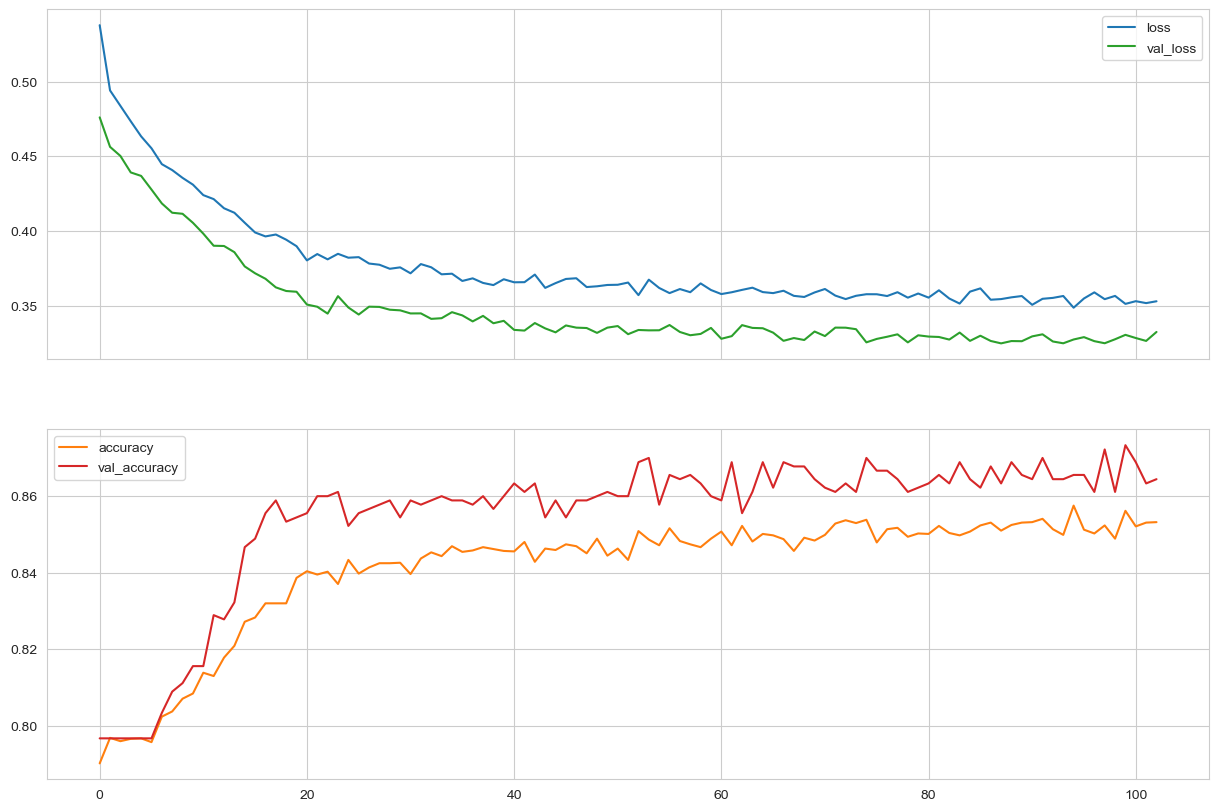

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [72]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3712696433067322
accuracy:  0.847000002861023


In [73]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[757  39]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.78      0.70      0.72      1000
weighted avg       0.83      0.85      0.83      1000



# L1 and L2 Regularizations(Weight Decay)

In [74]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [75]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3),
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l2(1e-5), 
                input_dim=X_train.shape[1]))

model.add(Dense(18, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l2(1e-5)))

model.add(Dense(9, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l2(1e-5)))


model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [76]:
model.fit(x=X_train,
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          callbacks=[early_stop],
          verbose=1
)

Epoch 1/600
254/254 [==============================] - 2s 3ms/step - loss: 0.6778 - accuracy: 0.7970 - val_loss: 0.5917 - val_accuracy: 0.8044
Epoch 2/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.8009 - val_loss: 0.5346 - val_accuracy: 0.8000
Epoch 3/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5274 - accuracy: 0.8060 - val_loss: 0.5086 - val_accuracy: 0.8122
Epoch 4/600
254/254 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.8102 - val_loss: 0.5000 - val_accuracy: 0.8089
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.8107 - val_loss: 0.4880 - val_accuracy: 0.8100
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8111 - val_loss: 0.4808 - val_accuracy: 0.8111
Epoch 7/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4836 - accuracy: 0.8099 - val_loss: 0.4754 - val_accuracy: 0.8122

Epoch 58/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.8590 - val_loss: 0.3583 - val_accuracy: 0.8678
Epoch 59/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8601 - val_loss: 0.3615 - val_accuracy: 0.8678
Epoch 60/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3756 - accuracy: 0.8591 - val_loss: 0.3602 - val_accuracy: 0.8644
Epoch 61/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8601 - val_loss: 0.3584 - val_accuracy: 0.8600
Epoch 62/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3752 - accuracy: 0.8611 - val_loss: 0.3601 - val_accuracy: 0.8656
Epoch 63/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8609 - val_loss: 0.3624 - val_accuracy: 0.8622
Epoch 64/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8568 - val_loss: 0.3604 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8568 - val_loss: 0.3500 - val_accuracy: 0.8700
Epoch 116/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8591 - val_loss: 0.3563 - val_accuracy: 0.8578
Epoch 117/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8590 - val_loss: 0.3504 - val_accuracy: 0.8633
Epoch 118/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8574 - val_loss: 0.3527 - val_accuracy: 0.8711
Epoch 119/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8599 - val_loss: 0.3674 - val_accuracy: 0.8656
Epoch 120/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8604 - val_loss: 0.3548 - val_accuracy: 0.8644
Epoch 121/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8581 - val_loss: 0.3488 - val_ac

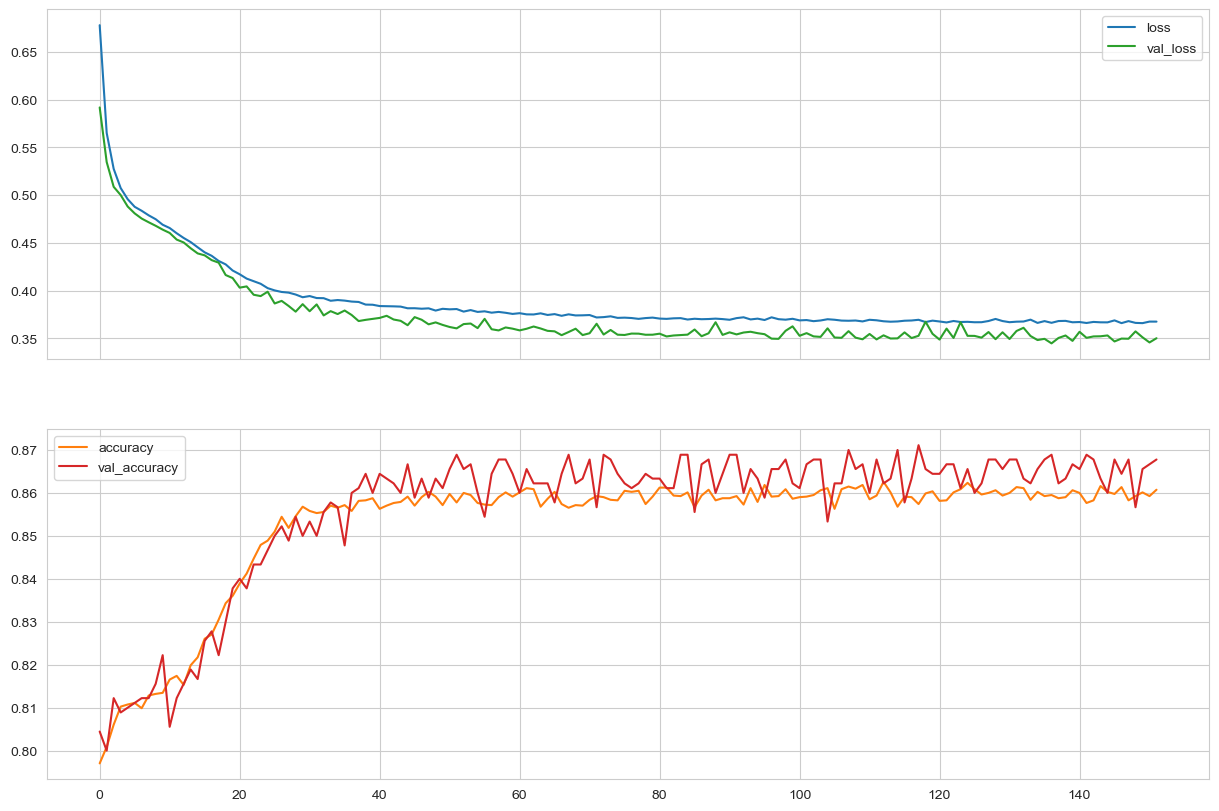

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"], ["accuracy","val_accuracy"]], layout=(2,1), figsize=(15,10))
plt.show()

In [78]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.39107027649879456
accuracy:  0.8500000238418579


In [79]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[759  37]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 1ms/step


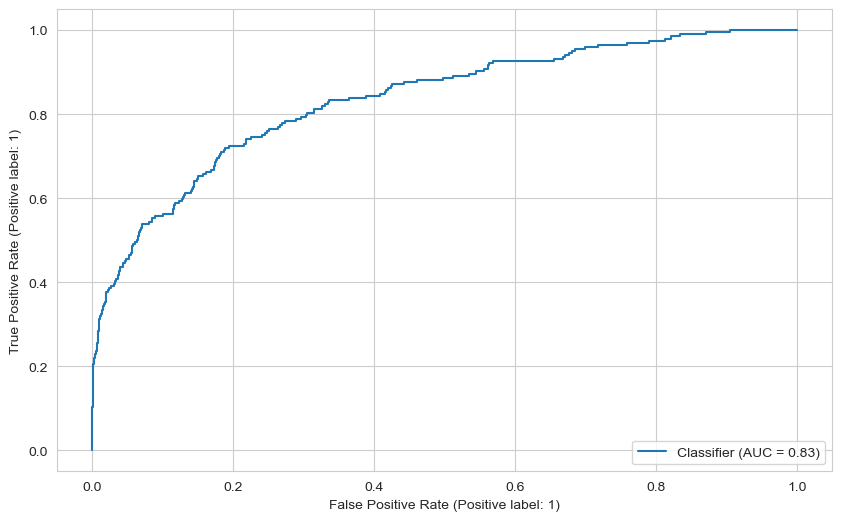

In [80]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [81]:
roc_auc_score(y_test, y_pred_proba)

0.833856783919598

## Optuna

In [82]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [83]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [84]:
trial_metric = "Accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128)
    n_units2 = trial.suggest_int("n_units2", 16, 64)
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])

    tf.random.set_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l2(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l2(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l2(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 2)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [85]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15) # if you want to be more precise increase the number of trials
display(study.best_params)

[I 2023-05-04 00:02:59,754] A new study created in memory with name: no-name-f439e867-d561-4113-8f1c-a744419a57a0
C:\Users\kucur\AppData\Roaming\Python\Python39\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\kucur\AppData\Roaming\Python\Python39\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\kucur\AppData\Roaming\Python\Python39\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.opti

Restoring model weights from the end of the best epoch: 84.
Epoch 99: early stopping


[I 2023-05-04 00:03:35,910] Trial 0 finished with value: 0.8479999899864197 and parameters: {'n_units1': 106, 'n_units2': 38, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.006443560026137224, 'regularizer1': 4.4659169300704126e-05, 'regularizer2': 7.11964770397751e-05, 'dropout': 0.3, 'w0': 0.15126064564891373, 'w1': 0.09104029242295167}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 16.
Epoch 31: early stopping


[I 2023-05-04 00:03:45,628] Trial 1 finished with value: 0.7960000038146973 and parameters: {'n_units1': 101, 'n_units2': 47, 'n_units3': 60, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.027649948782809807, 'regularizer1': 0.0007617955350000812, 'regularizer2': 0.00014978456994186007, 'dropout': 0, 'w0': 4.735256485121073, 'w1': 0.38728915362055066}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-05-04 00:03:54,181] Trial 2 finished with value: 0.7960000038146973 and parameters: {'n_units1': 106, 'n_units2': 25, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0005636978477795805, 'regularizer1': 7.273739579178181e-05, 'regularizer2': 0.0001815146252291419, 'dropout': 0.5, 'w0': 0.3002564171353395, 'w1': 0.026981358045474607}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-05-04 00:04:01,162] Trial 3 finished with value: 0.7960000038146973 and parameters: {'n_units1': 74, 'n_units2': 34, 'n_units3': 41, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 2.4498090216911796e-05, 'regularizer1': 0.00014181286606281804, 'regularizer2': 3.735498104651275e-05, 'dropout': 0, 'w0': 0.7496961513337562, 'w1': 0.034895393716873925}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-05-04 00:04:09,384] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 71, 'n_units2': 29, 'n_units3': 44, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.003340095711373646, 'regularizer1': 0.0001555947800004872, 'regularizer2': 8.277896367386092e-05, 'dropout': 0.5, 'w0': 2.119570757991444, 'w1': 0.03292990499174798}. Best is trial 0 with value: 0.8479999899864197.
[I 2023-05-04 00:07:17,270] Trial 5 finished with value: 0.2070000022649765 and parameters: {'n_units1': 82, 'n_units2': 39, 'n_units3': 34, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.1124010210467715e-05, 'regularizer1': 0.0009937057017769901, 'regularizer2': 0.00041136810161828297, 'dropout': 0, 'w0': 0.024372094257244698, 'w1': 0.13117714512145526}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 320.
Epoch 335: early stopping


[I 2023-05-04 00:09:13,837] Trial 6 finished with value: 0.7730000019073486 and parameters: {'n_units1': 94, 'n_units2': 46, 'n_units3': 48, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.7438934173128153e-05, 'regularizer1': 0.0002479913204760872, 'regularizer2': 1.5134835269551043e-05, 'dropout': 0.3, 'w0': 0.1483058498336661, 'w1': 0.37120657228584364}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-04 00:09:20,363] Trial 7 finished with value: 0.20399999618530273 and parameters: {'n_units1': 102, 'n_units2': 41, 'n_units3': 17, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.05570904502832414, 'regularizer1': 0.00019046665963568622, 'regularizer2': 4.6148331452758936e-05, 'dropout': 0.3, 'w0': 0.013455075212906236, 'w1': 1.4819420094855893}. Best is trial 0 with value: 0.8479999899864197.
[I 2023-05-04 00:12:26,417] Trial 8 finished with value: 0.7940000295639038 and parameters: {'n_units1': 92, 'n_units2': 33, 'n_units3': 46, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.697114848239016e-05, 'regularizer1': 1.4269274882024435e-05, 'regularizer2': 0.00012445012824096192, 'dropout': 0, 'w0': 0.30694515869708255, 'w1': 0.351446694345175}. Best is trial 0 with value: 0.8479999899864197.
[I 2023-05-04 00:16:29,267] Trial 9 finished with value: 0.41100001335144043 and parameters: {'n_units1': 102, 'n_units2': 32, '

Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-05-04 00:16:39,425] Trial 10 finished with value: 0.7960000038146973 and parameters: {'n_units1': 124, 'n_units2': 58, 'n_units3': 21, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.009229958075750222, 'regularizer1': 3.352817790778277e-05, 'regularizer2': 0.0006111427661057782, 'dropout': 0.3, 'w0': 0.08416830154862608, 'w1': 0.016908956642639358}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-05-04 00:16:48,544] Trial 11 finished with value: 0.7960000038146973 and parameters: {'n_units1': 118, 'n_units2': 16, 'n_units3': 63, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.05263920490513791, 'regularizer1': 0.0008148851185754994, 'regularizer2': 0.0002567137262391224, 'dropout': 0, 'w0': 4.731339528266882, 'w1': 0.0737901385570868}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-05-04 00:16:58,011] Trial 12 finished with value: 0.7960000038146973 and parameters: {'n_units1': 113, 'n_units2': 52, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.008848891116497646, 'regularizer1': 5.1465261254306426e-05, 'regularizer2': 0.00025391907498729477, 'dropout': 0.3, 'w0': 0.9746732220795662, 'w1': 0.010421756691234699}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-05-04 00:17:07,170] Trial 13 finished with value: 0.7960000038146973 and parameters: {'n_units1': 86, 'n_units2': 63, 'n_units3': 53, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0929120265927799, 'regularizer1': 0.00039566633392940754, 'regularizer2': 0.0006132546794030404, 'dropout': 0, 'w0': 4.137619841298451, 'w1': 0.31529808129015685}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-05-04 00:17:15,727] Trial 14 finished with value: 0.7960000038146973 and parameters: {'n_units1': 111, 'n_units2': 49, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0209890120465674, 'regularizer1': 3.218325657189711e-05, 'regularizer2': 0.0009148645759662639, 'dropout': 0.5, 'w0': 0.7637108216110621, 'w1': 0.06623186369791909}. Best is trial 0 with value: 0.8479999899864197.


{'n_units1': 106,
 'n_units2': 38,
 'n_units3': 25,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 0.006443560026137224,
 'regularizer1': 4.4659169300704126e-05,
 'regularizer2': 7.11964770397751e-05,
 'dropout': 0.3,
 'w0': 0.15126064564891373,
 'w1': 0.09104029242295167}

In [86]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
127/127 [==============================] - 2s 4ms/step - loss: 0.5138 - Accuracy: 0.7959 - val_loss: 0.4689 - val_Accuracy: 0.8033
Epoch 2/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4619 - Accuracy: 0.8069 - val_loss: 0.4141 - val_Accuracy: 0.8211
Epoch 3/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4286 - Accuracy: 0.8299 - val_loss: 0.3772 - val_Accuracy: 0.8533
Epoch 4/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4076 - Accuracy: 0.8389 - val_loss: 0.3710 - val_Accuracy: 0.8611
Epoch 5/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4022 - Accuracy: 0.8360 - val_loss: 0.3683 - val_Accuracy: 0.8533
Epoch 6/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4000 - Accuracy: 0.8391 - val_loss: 0.3620 - val_Accuracy: 0.8556
Epoch 7/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3988 - Accuracy: 0.8463 - val_loss: 0.3569 - val_Accuracy: 0.8589

In [87]:
history = model.history.history

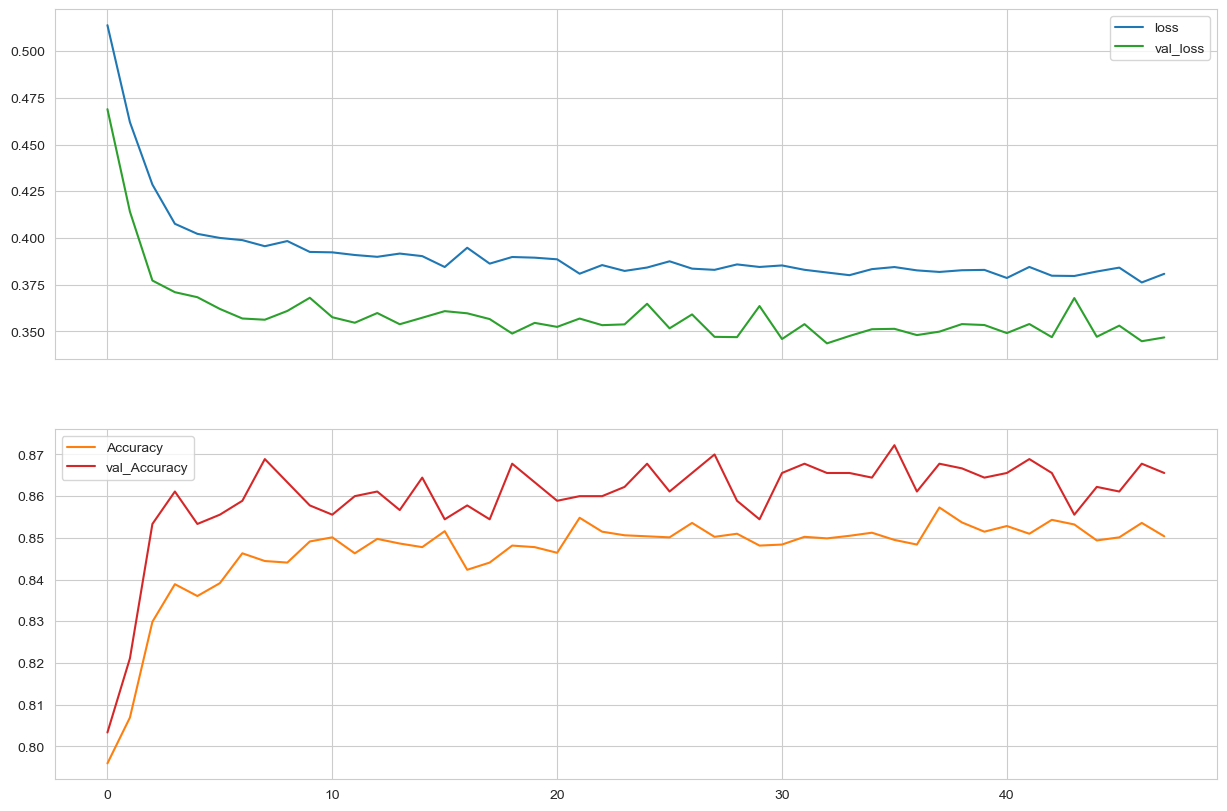

In [88]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [89]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[761  35]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       796
           1       0.73      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



32/32 [==============================] - 0s 1ms/step


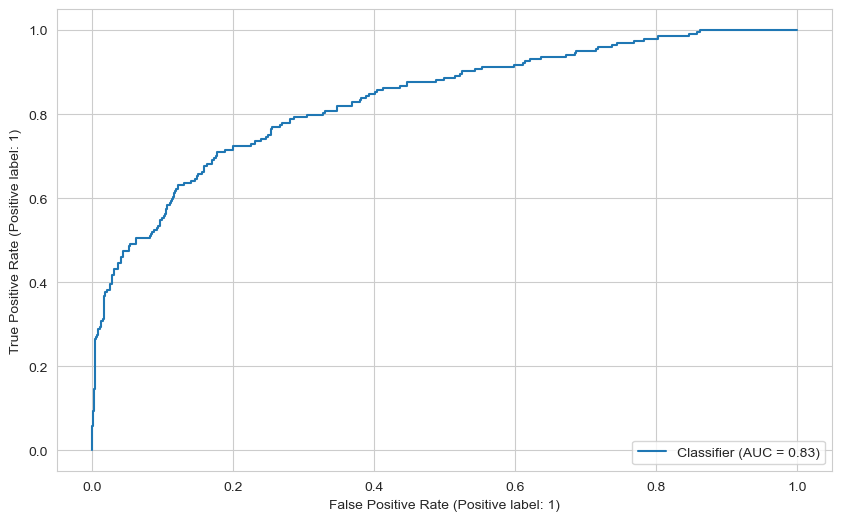

In [90]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [91]:
roc_auc_score(y_test, y_pred_proba)

0.833524238841265

# Final Model and Model Deployment

In [93]:
import pickle

pickle.dump(scaler, open("scaler_Exited", "wb"))

In [94]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[761  35]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       796
           1       0.73      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [95]:
model.save("model_Exited.h5")

## Loading Model and Scaler

In [96]:
from tensorflow.keras.models import load_model

In [98]:
model_Exited = load_model("model_Exited.h5")
scaler_Exited = pickle.load(open("scaler_Exited", "rb"))

## Prediction

In [103]:
example = df.drop("Exited", axis=1).iloc[20:21, :]
example

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
20,732,41,8,0.000,2,1,1,170886.170,1,0,0,0,1


In [104]:
example = scaler_Exited.transform(example)
example

array([[0.764     , 0.31081081, 0.8       , 0.        , 0.33333333,
        1.        , 1.        , 0.8543974 , 1.        , 0.        ,
        0.        , 0.        , 1.        ]])

In [105]:
(model_Exited.predict(example) > 0.5).astype("int32")

1/1 [==============================] - 0s 20ms/step


array([[0]])

In [106]:
df["Exited"].iloc[20:21]

20    0
Name: Exited, dtype: int64